In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='Hancom Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 생물학적 뉴런에서 인공 뉴런까지
## 퍼셉트론

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # 두 개의 꽃에 대해 True과 False를 예측합니다.

In [7]:
y_pred

array([ True, False])

Perceptron은 loss="perceptron", 정규화 없음, 학습률이 일정하게 1인 SGDClassifier와 동일합니다:

In [8]:
# 추가 코드 - 퍼셉트론을 구축하고 훈련하는 방법을 보여줍니다.

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

퍼셉트론이 클래스를 적절히 구분하는 결정 경계를 찾으면 학습을 중단합니다. 이는 결정 경계가 종종 한 클래스에 매우 가깝다는 것을 의미합니다:

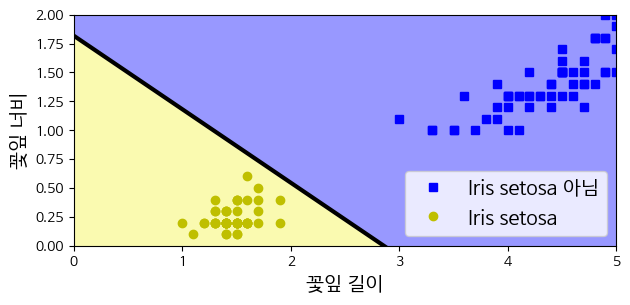

In [9]:
# 추가 코드 - 붓꽃 데이터 세트에 대한 퍼셉트론의 결정 경계를 표시합니다.

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris setosa 아님")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("꽃잎 길이")
plt.ylabel("꽃잎 너비")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

활성화 함수

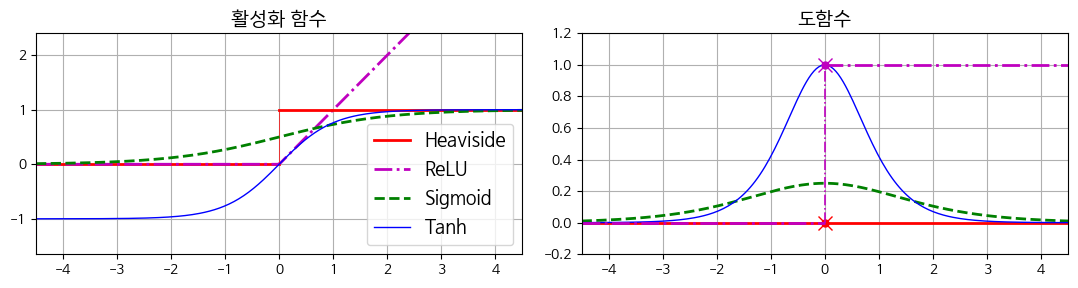

In [10]:
# 추가 코드 - 이 셀은 그림 10-8을 생성하고 저장합니다.

from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("활성화 함수")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("도함수")
plt.axis([-max_z, max_z, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

# 회귀 MLP

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [12]:
rmse

0.5053326657968465

In [13]:
# 추가 코드 - 이것은 독자를 위한 연습으로 남겨두었습니다.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

# 케라스로 MLP 구현하기
## 시퀀셜 API를 사용하여 이미지 분류기 만들기
### 케라스를 사용하여 데이터셋 적재하기
먼저 패션 MNIST 데이터셋을 로드해 보겠습니다. 케라스에는 tf.keras.datasets에서 인기 있는 데이터셋을 로드하는 여러 함수를 제공합니다. 이 데이터셋은 이미 훈련 세트(60,000개 이미지)와 테스트 세트(10,000개 이미지)로 분할되어 있습니다. 하지만 훈련 세트를 더 분할하여 검증 세트를 만드는 것이 좋습니다. 훈련에는 55,000개의 이미지를, 검증에는 5,000개의 이미지를 사용하겠습니다.

In [14]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

훈련 세트에는 각각 28x28픽셀의 55,000개의 흑백 이미지가 포함되어 있습니다:

In [15]:
X_train.shape

(55000, 28, 28)

각 픽셀 강도는 한 바이트(0~255)로 표시됩니다:

In [16]:
X_train.dtype

dtype('uint8')

픽셀 강도를 0-1 범위로 축소하기 위해 255로 나누겠습니다:

In [17]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

Matplotlib의 imshow() 함수를 사용하여 'binary' 컬러 맵으로 이미지를 플로팅할 수 있습니다:

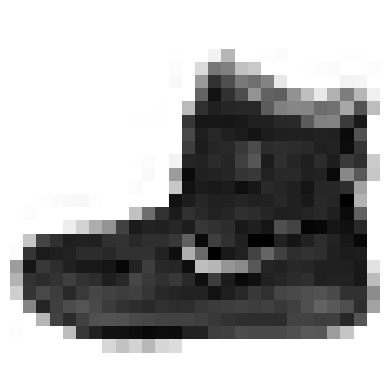

In [18]:
# 추가 코드

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

레이블은 0에서 9까지의 클래스 ID(uint8로 표시)입니다:

In [19]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

해당 클래스 이름은 다음과 같습니다:

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

따라서 훈련 세트의 첫 번째 이미지는 앵클부츠입니다:

In [21]:
class_names[y_train[0]]

'Ankle boot'

데이터셋에 있는 이미지 샘플을 살펴보겠습니다:

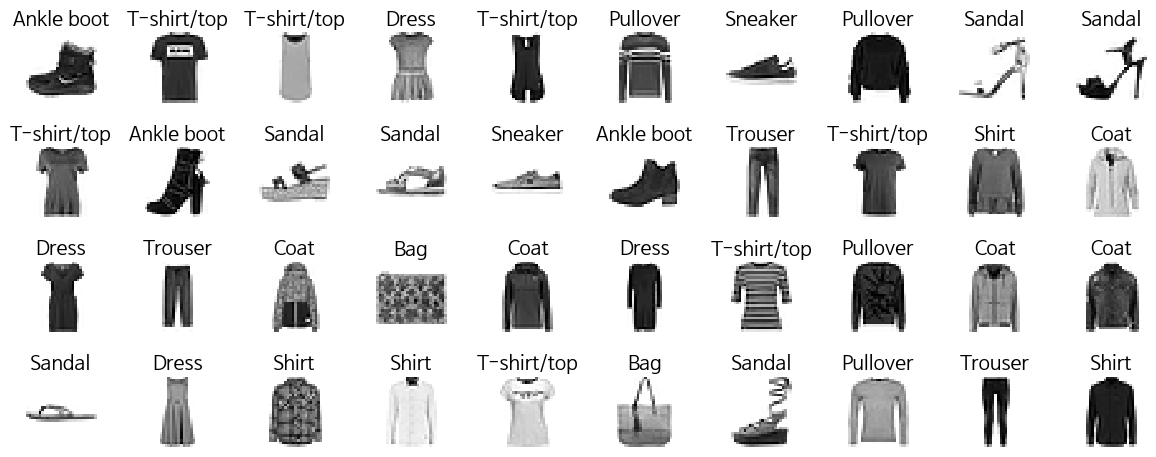

In [22]:
# 추가 코드 - 이 셀은 그림 10-10을 생성하고 저장합니다.

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

시퀀셜 API를 사용하여 모델 만들기

In [23]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [24]:
# 추가 코드 - 세션을 지워 이름 카운터를 재설정합니다.
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [27]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [28]:
# 추가 코드 - 모델의 아키텍처를 표시하는 또 다른 방법
#tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [29]:
model.layers

In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [31]:
model.get_layer('dense') is hidden1

True

In [32]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02540937,  0.02969781, -0.05806886, ..., -0.06238609,
        -0.05005798,  0.01348884],
       [-0.02310801,  0.03428839,  0.04917068, ..., -0.07388595,
        -0.06886711,  0.05722012],
       [ 0.04836824,  0.00644844,  0.00314739, ...,  0.00300791,
         0.02354136,  0.06682335],
       ...,
       [-0.01389303,  0.07240915, -0.00116749, ..., -0.05570877,
        -0.0626525 ,  0.03116381],
       [-0.0570783 ,  0.0600023 ,  0.0645418 , ..., -0.00653512,
        -0.01477712, -0.06486174],
       [ 0.03871437,  0.04454811, -0.00347482, ..., -0.04918975,
         0.0063087 , -0.02503897]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

# 모델 컴파일

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

이는 다음과 같습니다:

In [37]:
# 추가 코드 - 이 셀은 이전 셀과 동일합니다.
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [38]:
# 추가 코드 - 클래스 ID를 원핫 벡터로 변환하는 방법을 보여줍니다.
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

참고: 클래스 수가 샘플의 클래스 ID 최댓값보다 클 경우 num_classes를 설정하는 것이 중요합니다.

In [39]:
# 추가 코드 - 원핫 벡터를 클래스 ID로 변환하는 방법을 보여줍니다.
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0], dtype=int64)

모델 훈련 및 평가

In [40]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 4s 2ms/step - loss: 0.7158 - sparse_categorical_accuracy: 0.7639 - val_loss: 0.5004 - val_sparse_categorical_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4821 - sparse_categorical_accuracy: 0.8329 - val_loss: 0.4632 - val_sparse_categorical_accuracy: 0.8292
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4362 - sparse_categorical_accuracy: 0.8461 - val_loss: 0.4202 - val_sparse_categorical_accuracy: 0.8502
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4124 - sparse_categorical_accuracy: 0.8562 - val_loss: 0.3947 - val_sparse_categorical_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3918 - sparse_categorical_accuracy: 0.8627 - val_loss: 0.3912 - val_sparse_categorical_accuracy: 0.8592
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3761 - spa

In [41]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [42]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


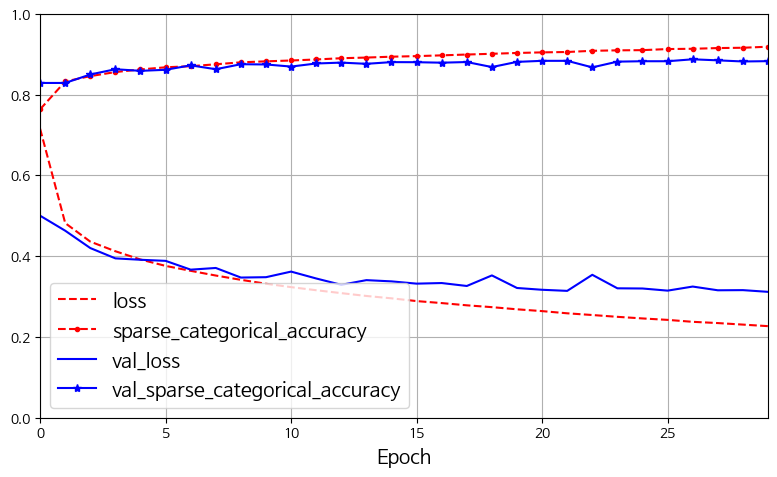

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # 추가 코드
save_fig("keras_learning_curves_plot")  # 추가 코드
plt.show()

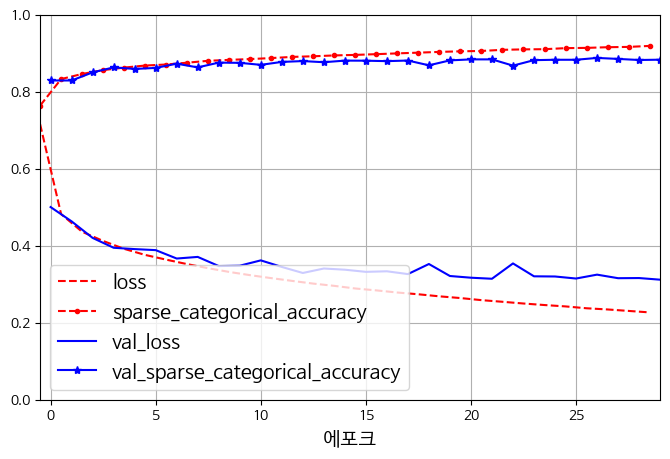

In [44]:
# 추가 코드 - 훈련 곡선을 -1/2 에포크로 이동하는 방법을 보여줍니다.
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("에포크")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [45]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3241 - sparse_categorical_accuracy: 0.8858


[0.3240688741207123, 0.8858000040054321]

모델을 사용하여 예측하기

In [46]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 102ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [47]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [48]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [49]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

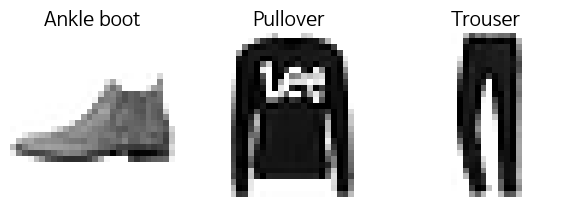

In [50]:
# 추가 코드 - 이 셀은 그림 10-12를 생성하고 저장합니다.
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# 시퀀셜 API를 사용하여 회귀 MLP 만들기
캘리포니아 주택 데이터셋(2장에서와 같이 수정된 데이터셋이 아닌 원본 데이터셋)을 로드하고, 분할하고, 스케일을 조정해 보겠습니다:

In [51]:
# 추가 코드 - 이전과 같이 캘리포니아 주택 데이터 집합을 로드하고 분할합니다.
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9190 - root_mean_squared_error: 0.9586 - val_loss: 0.4018 - val_root_mean_squared_error: 0.6339
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3723 - root_mean_squared_error: 0.6102 - val_loss: 3.0008 - val_root_mean_squared_error: 1.7323
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3841 - root_mean_squared_error: 0.6198 - val_loss: 0.3641 - val_root_mean_squared_error: 0.6034
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3437 - root_mean_squared_error: 0.5862 - val_loss: 2.3266 - val_root_mean_squared_error: 1.5253
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3385 - root_mean_squared_error: 0.5818 - val_loss: 4.1372 - val_root_mean_squared_error: 2.0340
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3579 - root_mean_squared_error: 0.5982 - val_loss: 1.5104 - val_

In [52]:
rmse_test

0.537985622882843

In [53]:
y_pred

array([[0.4912058],
       [1.009197 ],
       [5.4136634]], dtype=float32)

# 함수형 API를 사용하여 복잡한 모델 구축
모든 신경망 모델이 단순히 순차적인 구조를 가지지 않습니다. 일부는 복잡한 토폴로지를 가질 수 있습니다. 일부는 여러 개의 입력 및/또는 여러 개의 출력을 가질 수 있습니다. 예를 들어, 와이드 & 딥 신경망(논문 참조)은 입력의 전부 또는 일부를 출력 레이어에 직접 연결합니다.

In [54]:
# 추가 코드 - 이름 카운터를 재설정하고 코드를 재현 가능하게 만듭니다.
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [55]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [56]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

In [57]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1832 - root_mean_squared_error: 1.0878 - val_loss: 0.8487 - val_root_mean_squared_error: 0.9212
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4677 - root_mean_squared_error: 0.6839 - val_loss: 1.7378 - val_root_mean_squared_error: 1.3183
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4089 - root_mean_squared_error: 0.6394 - val_loss: 0.8589 - val_root_mean_squared_error: 0.9267
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3774 - root_mean_squared_error: 0.6144 - val_loss: 0.9392 - val_root_mean_squared_error: 0.9691
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3664 - root_mean_squared_error: 0.6053 - val_loss: 2.4351 - val_root_mean_squared_error: 1.5605
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3667 - root_mean_squared_error: 0.6055 - val_loss: 1.6446 - val_

와이드 또는 딥 경로를 통해 입력 특성의 일부를 각기 다르게 보내려면 어떻게 해야 하나요? 5개의 특성(특성 0~4)와 6개의 특성을 딥 경로(특성 2~7)를 통해 전달하겠습니다. 3개의 특성(특성 2, 3, 4)은 양쪽을 모두 통과합니다.

In [58]:
tf.random.set_seed(42)  # 추가 코드

In [59]:
input_wide = tf.keras.layers.Input(shape=[5])  # 특성 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # 특성 2 ~ 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [60]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 2.0148 - root_mean_squared_error: 1.4194 - val_loss: 0.8837 - val_root_mean_squared_error: 0.9401
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6365 - root_mean_squared_error: 0.7978 - val_loss: 2.6969 - val_root_mean_squared_error: 1.6422
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5345 - root_mean_squared_error: 0.7311 - val_loss: 0.4823 - val_root_mean_squared_error: 0.6945
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4489 - root_mean_squared_error: 0.6700 - val_loss: 0.5077 - val_root_mean_squared_error: 0.7125
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4043 - root_mean_squared_error: 0.6358 - val_loss: 0.4563 - val_root_mean_squared_error: 0.6755
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3780 - root_mean_squared_error: 0.6148 - val_loss: 0.9281 - val_

규제를 위한 보조 출력 추가:

In [61]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [62]:
input_wide = tf.keras.layers.Input(shape=[5])  # 특성 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # 특성 2 ~ 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [63]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [64]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.7441 - dense_2_loss: 1.7256 - dense_3_loss: 1.9099 - dense_2_root_mean_squared_error: 1.3136 - dense_3_root_mean_squared_error: 1.3820 - val_loss: 0.7943 - val_dense_2_loss: 0.7816 - val_dense_3_loss: 0.9085 - val_dense_2_root_mean_squared_error: 0.8841 - val_dense_3_root_mean_squared_error: 0.9531
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5726 - dense_2_loss: 0.5546 - dense_3_loss: 0.7346 - dense_2_root_mean_squared_error: 0.7447 - dense_3_root_mean_squared_error: 0.8571 - val_loss: 1.3101 - val_dense_2_loss: 1.3673 - val_dense_3_loss: 0.7958 - val_dense_2_root_mean_squared_error: 1.1693 - val_dense_3_root_mean_squared_error: 0.8921
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4806 - dense_2_loss: 0.4665 - dense_3_loss: 0.6068 - dense_2_root_mean_squared_error: 0.6830 - dense_3_root_mean_squared_error: 0.7790 - val_loss: 0.5750 - val_dense_2_loss

In [65]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 2ms/step - loss: 0.3380 - dense_2_loss: 0.3319 - dense_3_loss: 0.3928 - dense_2_root_mean_squared_error: 0.5761 - dense_3_root_mean_squared_error: 0.6267


In [66]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 103ms/step


In [67]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 34ms/step


# 서브클래싱 API를 사용하여 동적 모델 만들기

In [68]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # 모델 이름을 지정하는 데 필요합니다
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # 추가 코드 - 재현성을 위한 것
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 1.6357 - output_1_loss: 1.5726 - output_2_loss: 2.2038 - output_1_root_mean_squared_error: 1.2540 - output_2_root_mean_squared_error: 1.4845 - val_loss: 4.0482 - val_output_1_loss: 3.4825 - val_output_2_loss: 9.1401 - val_output_1_root_mean_squared_error: 1.8661 - val_output_2_root_mean_squared_error: 3.0233
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5143 - output_1_loss: 0.4860 - output_2_loss: 0.7687 - output_1_root_mean_squared_error: 0.6971 - output_2_root_mean_squared_error: 0.8768 - val_loss: 1.2793 - val_output_1_loss: 1.0655 - val_output_2_loss: 3.2034 - val_output_1_root_mean_squared_error: 1.0322 - val_output_2_root_mean_squared_error: 1.7898
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4357 - output_1_loss: 0.4173 - output_2_loss: 0.6008 - output_1_root_mean_squared_error: 0.6460 - output_2_root_mean_squared_error: 0.7751 - val_loss: 0.952

# 모델 저장 및 복원

In [70]:
# 추가 코드 - 이미 존재하는 경우 디렉토리를 삭제합니다.

import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [71]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


In [72]:
# 추가 코드 - my_keras_model/ directory의 내용 표시
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model\assets
my_keras_model\fingerprint.pb
my_keras_model\keras_metadata.pb
my_keras_model\saved_model.pb
my_keras_model\variables
my_keras_model\variables\variables.data-00000-of-00001
my_keras_model\variables\variables.index


In [73]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 121ms/step


In [74]:
model.save_weights("my_weights")

In [75]:
model.load_weights("my_weights")

In [76]:
# 추가 코드 - my_weights.* 파일 목록 표시
for path in sorted(Path().glob("my_weights.*")):
    print(path)

my_weights.data-00000-of-00001
my_weights.index


# 콜백 사용하기

In [77]:
shutil.rmtree("my_checkpoints", ignore_errors=True)  # 추가 코드

In [78]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 0.3612 - output_1_loss: 0.3527 - output_2_loss: 0.4382 - output_1_root_mean_squared_error: 0.5939 - output_2_root_mean_squared_error: 0.6619 - val_loss: 1.3677 - val_output_1_loss: 1.4233 - val_output_2_loss: 0.8670 - val_output_1_root_mean_squared_error: 1.1930 - val_output_2_root_mean_squared_error: 0.9311
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3657 - output_1_loss: 0.3585 - output_2_loss: 0.4303 - output_1_root_mean_squared_error: 0.5988 - output_2_root_mean_squared_error: 0.6560 - val_loss: 1.4335 - val_output_1_loss: 1.3815 - val_output_2_loss: 1.9011 - val_output_1_root_mean_squared_error: 1.1754 - val_output_2_root_mean_squared_error: 1.3788
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3635 - output_1_loss: 0.3563 - output_2_loss: 0.4282 - output_1_root_mean_squared_error: 0.5969 - output_2_root_mean_squared_error: 0.6544 - val_loss: 1.157

In [79]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3360 - output_1_loss: 0.3291 - output_2_loss: 0.3989 - output_1_root_mean_squared_error: 0.5736 - output_2_root_mean_squared_error: 0.6316 - val_loss: 0.6416 - val_output_1_loss: 0.6639 - val_output_2_loss: 0.4410 - val_output_1_root_mean_squared_error: 0.8148 - val_output_2_root_mean_squared_error: 0.6641
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3399 - output_1_loss: 0.3334 - output_2_loss: 0.3979 - output_1_root_mean_squared_error: 0.5774 - output_2_root_mean_squared_error: 0.6308 - val_loss: 1.2295 - val_output_1_loss: 1.2480 - val_output_2_loss: 1.0632 - val_output_1_root_mean_squared_error: 1.1171 - val_output_2_root_mean_squared_error: 1.0311
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3417 - output_1_loss: 0.3356 - output_2_loss: 0.3961 - output_1_root_mean_squared_error: 0.5793 - output_2_root_mean_squared_error: 0.6293 - val_loss: 0.

363/363 [==============================] - 1s 3ms/step - loss: 0.3173 - output_1_loss: 0.3120 - output_2_loss: 0.3653 - output_1_root_mean_squared_error: 0.5585 - output_2_root_mean_squared_error: 0.6044 - val_loss: 0.4747 - val_output_1_loss: 0.4694 - val_output_2_loss: 0.5224 - val_output_1_root_mean_squared_error: 0.6851 - val_output_2_root_mean_squared_error: 0.7228
Epoch 23/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3142 - output_1_loss: 0.3085 - output_2_loss: 0.3654 - output_1_root_mean_squared_error: 0.5554 - output_2_root_mean_squared_error: 0.6045 - val_loss: 0.3234 - val_output_1_loss: 0.3125 - val_output_2_loss: 0.4218 - val_output_1_root_mean_squared_error: 0.5590 - val_output_2_root_mean_squared_error: 0.6495
Epoch 24/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3154 - output_1_loss: 0.3098 - output_2_loss: 0.3660 - output_1_root_mean_squared_error: 0.5566 - output_2_root_mean_squared_error: 0.6050 - val_loss: 0.8107 - val

In [80]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [81]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.37
Epoch=1, val/train=2.70
Epoch=2, val/train=1.55
Epoch=3, val/train=2.96
Epoch=4, val/train=3.43
Epoch=5, val/train=1.99
Epoch=6, val/train=1.03
Epoch=7, val/train=1.25
Epoch=8, val/train=1.99
Epoch=9, val/train=3.90


# 텐서보드를 사용해 시각화하기
콜랩에는 텐서보드가 미리 설치되어 있지만, tensorboard-plugin-profile은 설치되어 있지 않으므로 설치해 보겠습니다:

In [88]:
#%pip install -q -U tensorboard-plugin-profile

Note: you may need to restart the kernel to use updated packages.


In [83]:
import shutil
shutil.rmtree("my_logs", ignore_errors=True)

In [84]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [85]:
# 추가 코드 - 앞서 사용한 첫 번째 회귀 모델을 만듭니다.
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [86]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5017 - root_mean_squared_error: 1.5817 - val_loss: 1.7231 - val_root_mean_squared_error: 1.3127
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0139 - root_mean_squared_error: 1.0069 - val_loss: 0.8710 - val_root_mean_squared_error: 0.9333
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7622 - root_mean_squared_error: 0.8730 - val_loss: 0.8142 - val_root_mean_squared_error: 0.9023
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6778 - root_mean_squared_error: 0.8233 - val_loss: 0.6147 - val_root_mean_squared_error: 0.7840
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6231 - root_mean_squared_error: 0.7894 - val_loss: 0.5705 - val_root_mean_squared_error: 0.7553
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5792 - root_mean_squared_error: 0.7611 - val_loss: 0.5358 - val_

In [87]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2024_05_28_21_57_03
    plugins
      profile
        2024_05_28_12_57_55
          DESKTOP-LNOVJK3.xplane.pb
    train
      events.out.tfevents.1716901075.DESKTOP-LNOVJK3.9536.0.v2
    validation
      events.out.tfevents.1716901076.DESKTOP-LNOVJK3.9536.1.v2


tensorboard 주피터 확장자를 로드하고 텐서보드 서버를 시작해 보겠습니다:

In [89]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

노트: 별도의 탭에서 텐서보드에 액세스하려면 아래에 있는 "localhost:6006" 링크를 클릭하세요:

In [90]:
# 추가 코드

if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

히스토그램, 이미지, 텍스트를 시각화할 수도 있고, TensorBoard를 사용하여 오디오를 들을 수도 있습니다:

In [92]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)

        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


노트: https://tensorboard.dev/ 에 로그를 업로드하여 전 세계와 공유할 수 있었습니다. 아쉽지만 이 서비스는 2023년 12월에 종료되었습니다. 따라서 이와 관련된 코드를 노트북에서 삭제합니다.

이 주피터 커널(런타임이라고도 함)을 중지하면 텐서보드 서버도 자동으로 중지됩니다. Linux 또는 MacOSX에서 실행 중인 경우 TensorBoard 서버를 중지하는 또 다른 방법은 서버를 수동으로 종료하는 것입니다. 먼저 해당 프로세스 ID를 찾아야 합니다:

In [93]:
# 추가 코드 - 실행 중인 모든 텐서보드 서버 인스턴스를 나열합니다.

from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:01:18 ago; pid 31632)



Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:00:31 ago; pid 4742)
다음으로 Linux 또는 MacOSX에서 다음 명령을 사용하여 <pid>를 위에 나열된 pid로 바꿉니다:

!kill <pid>
Windows에서는 다음과 같습니다:

!taskkill /F /PID <pid>

# 신경망 하이퍼파라미터 튜닝하기
이 섹션에서는 패션 MNIST 데이터셋을 다시 사용하겠습니다:

In [94]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [95]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [98]:
#%pip install -q -U keras_tuner

Note: you may need to restart the kernel to use updated packages.


In [99]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [100]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 46s]
val_accuracy: 0.8338000178337097

Best val_accuracy So Far: 0.8561999797821045
Total elapsed time: 00h 04m 29s


In [101]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [102]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [103]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8561999797821045


In [104]:
best_trial.metrics.get_last_value("val_accuracy")

0.8561999797821045

In [105]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3320 - accuracy: 0.8783
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3213 - accuracy: 0.8820
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3125 - accuracy: 0.8860
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.8887
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2985 - accuracy: 0.8894
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2907 - accuracy: 0.8924
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2839 - accuracy: 0.8962
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2800 - accuracy: 0.8965
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.8978
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3897 

In [106]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [107]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [108]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 01m 06s]
val_accuracy: 0.8446000218391418

Best val_accuracy So Far: 0.8795999884605408
Total elapsed time: 00h 25m 28s


In [109]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 50s]
val_accuracy: 0.8521999716758728

Best val_accuracy So Far: 0.8640000224113464
Total elapsed time: 00h 07m 13s


In [112]:
%tensorboard --logdir {root_logdir}

Reusing TensorBoard on port 6007 (pid 15984), started 0:02:22 ago. (Use '!kill 15984' to kill it.)

# 연습문제 해답
1. to 9.
부록 A 참조

10.
문제: 심층 MLP를 MNIST 데이터셋에 훈련해보세요(keras.datasets.mnist.load_data() 함수를 사용해 데이터를 적재할 수 있습니다). 98% 이상의 정확도를 얻을 수 있는지 확인해보세요. 이 장에서 소개한 방법을 사용해 최적의 학습률을 찾아보세요(즉 학습률을 지수적으로 증가시키면서 손실을 그래프로 그립니다. 그다음 손실이 다시 증가하는 지점을 찾습니다). 모든 부가 기능을 추가해보세요. 즉, 체크포인트를 저장하고, 조기 종료를 사용하고, 텐서보드를 사용해 학습 곡선을 그려보세요.

TODO: 케라스 튜너를 사용하도록 이 솔루션을 업데이트할 것.

데이터셋을 로드해 보겠습니다:

In [113]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

패션 MNIST 데이터셋과 마찬가지로, MNIST 훈련 세트에는 각각 28x28픽셀의 흑백 이미지 60,000개가 포함되어 있습니다:

In [114]:
X_train_full.shape

(60000, 28, 28)

각 픽셀 강도는 한 바이트(0~255)로도 표시됩니다:

In [115]:
X_train_full.dtype

dtype('uint8')

전체 훈련 세트를 검증 세트와 (더 작은) 훈련 세트로 분할해 보겠습니다. 또한 픽셀 강도를 0-1 범위로 실수로 축소하기 위해 패션 MNIST에서와 마찬가지로 255로 나눕니다:

In [116]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Matplotlib의 imshow() 함수를 사용하여 'binary' 컬러 맵으로 이미지를 그려 보겠습니다:

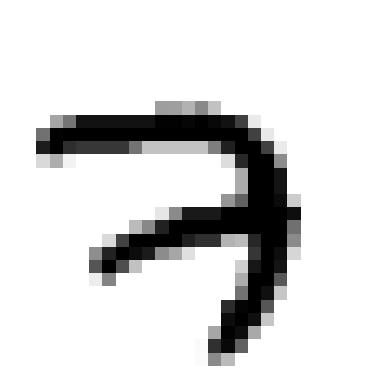

In [117]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

레이블은 0에서 9까지의 클래스 ID(uint8로 표시)입니다. 편리하게도 클래스 ID는 이미지에 표시된 숫자에 해당하므로 class_names 배열이 필요하지 않습니다:

In [118]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

검증 세트에는 5,000개의 이미지가, 테스트 세트에는 10,000개의 이미지가 포함되어 있습니다:

In [119]:
X_valid.shape

(5000, 28, 28)

In [120]:
X_test.shape

(10000, 28, 28)

데이터셋의 이미지 샘플을 살펴보겠습니다:

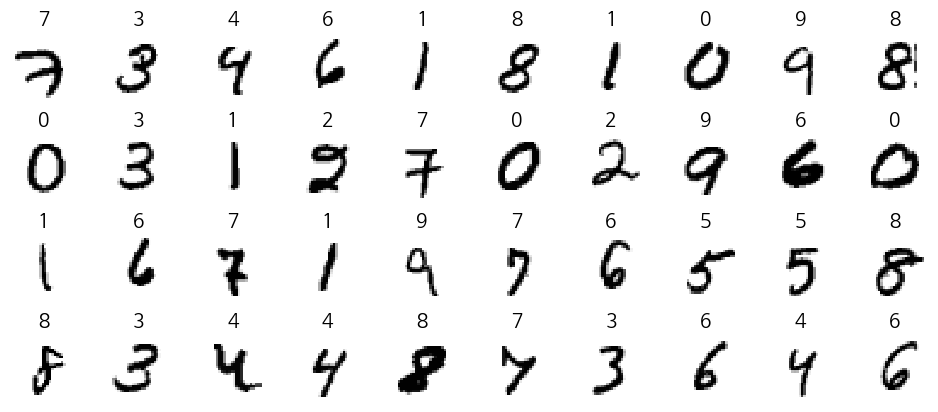

In [121]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

간단한 밀집 신경망을 구축하고 최적의 학습률을 찾아보겠습니다. 각 반복에서 학습률을 높이려면 콜백이 필요합니다. 또한 각 반복에서 학습률과 손실도 기록합니다:

In [122]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [123]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [124]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

1e-3의 작은 학습률로 시작하여 각 반복마다 0.5%씩 증가시킬 것입니다:

In [125]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

이제 단 한 번의 에포크 동안 모델을 훈련해 보겠습니다:

In [126]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.6112 - val_loss: nan - val_accuracy: 0.0958


이제 학습률의 함수로 손실을 그릴 수 있습니다:

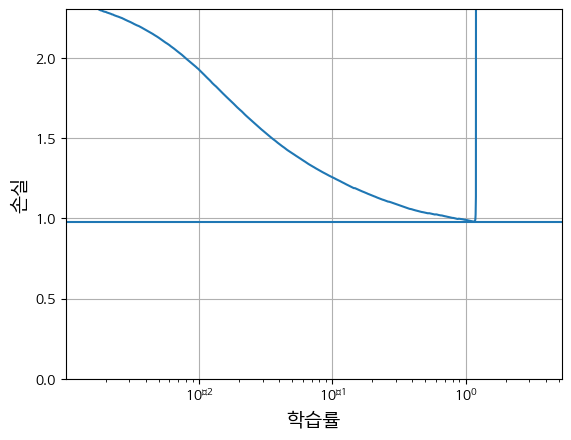

In [127]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("학습률")
plt.ylabel("손실")
plt.show()

학습률이 6e-1을 초과하면 손실이 다시 급격히 증가하기 시작하므로 그 절반인 3e-1을 사용해 보겠습니다:

In [128]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [129]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [130]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [131]:
run_index = 1 # 실행할 때마다 이 값을 증가시킵니다.
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

WindowsPath('my_mnist_logs/run_001')

In [134]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1716/1719 [============================>.] - ETA: 0s - loss: 0.2356 - accuracy: 0.9276INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 7s 4ms/step - loss: 0.2353 - accuracy: 0.9277 - val_loss: 0.1021 - val_accuracy: 0.9708
Epoch 2/100
1715/1719 [============================>.] - ETA: 0s - loss: 0.0961 - accuracy: 0.9703INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 6s 3ms/step - loss: 0.0961 - accuracy: 0.9703 - val_loss: 0.0905 - val_accuracy: 0.9746
Epoch 3/100
1707/1719 [============================>.] - ETA: 0s - loss: 0.0659 - accuracy: 0.9786INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 6s 3ms/step - loss: 0.0657 - accuracy: 0.9786 - val_loss: 0.0764 - val_accuracy: 0.9788
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0474 - accuracy: 0.9849 - val_loss: 0.0807 - val_accuracy: 0.9788
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0365 - accuracy: 0.9879 - val_loss: 0.0804 - val_accuracy: 0.9782
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.1007 - val_accuracy: 0.9752
Epoch 7/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.0874 - val_accuracy: 0.9796
Epoch 8/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0973 - val_accuracy: 0.9778
Epoch 9/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0978 - val_accuracy: 0.98

In [135]:
model = tf.keras.models.load_model("my_mnist_model") # 최상의 모델로 롤백
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0802 - accuracy: 0.9763


[0.08024406433105469, 0.9763000011444092]

98% 이상의 정확도를 얻었습니다. 마지막으로, 텐서보드를 사용하여 학습 곡선을 살펴봅시다:

In [136]:
%tensorboard --logdir=./my_mnist_logs --port 6007

ERROR: Failed to launch TensorBoard (exited with 4294967295).
Contents of stderr:
2024-05-28 22:56:00.110033: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-28 22:56:01.065781: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
E0528 22:56:03.417944 32100 program.py:300] TensorBoard could not bind to port 6007, it was already in use
ERROR: TensorBoard could not bind to port 6007, it was already in use